# LOGISTIC REGRESSION WORKFLOW (UNESCO DATASET)
Status: **DONE**

In [1]:
# IMPORT LIBRARIES
import sys
import os
import pandas as pd
import importlib
import joblib
from sklearn.linear_model import LogisticRegression
# Adding project root directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

# import logistic regression training function
from classical_models.uci_classical import train_text_model

# import evaluation function
from shared.metrics import compute_classic_metrics, plot_confusion_matrix, save_evaluation_report

importlib.reload(sys.modules['classical_models.uci_classical']) 
importlib.reload(sys.modules['shared.metrics'])

<module 'shared.metrics' from 'c:\\Users\\mosqu\\personal-projects\\dss_pit\\src\\shared\\metrics.py'>

In [2]:
df = pd.read_csv("../../../data/uci/cleaned_covid_lies.csv")

X = df["misconception"]
y = df["label"]

df.head()

,misconception,label
0,coronavirus genetically engineered,na
1,blowing conch shell destroys coronavirus potency,na
2,swan dolphin swimming venice canal following c...,na
3,cocaine cure coronavirus,na
4,observing janata curfew result reduction covid...,na


In [25]:
# run model

logreg = LogisticRegression(max_iter=3000, class_weight='balanced')

results = train_text_model(logreg,X_text=X,y=y,max_features=5000,ngram_range=(1,2),oversample_method='random')

[INFO] Final label distribution:
label
na     6149
pos     288
neg     154
Name: count, dtype: int64
[INFO] Oversampling method selected: random
  Before oversampling: {'na': 4919, 'pos': 230, 'neg': 123}
  After oversampling: {'na': 4919, 'neg': 4919, 'pos': 4919}


In [26]:
y_test = results['y_test']
y_pred = results['y_pred']

metrics = compute_classic_metrics(y_test, y_pred)
print("Accuracy:", metrics["accuracy"])
print("F1 Score:", metrics["f1_score"])
print(metrics["report"])

Accuracy: 0.7376800606520091
F1 Score: 0.8069614639133617
              precision    recall  f1-score   support

          na       0.99      0.74      0.85      1230
         neg       0.14      0.68      0.23        31
         pos       0.17      0.74      0.28        58

    accuracy                           0.74      1319
   macro avg       0.43      0.72      0.45      1319
weighted avg       0.93      0.74      0.81      1319



<Figure size 800x600 with 0 Axes>

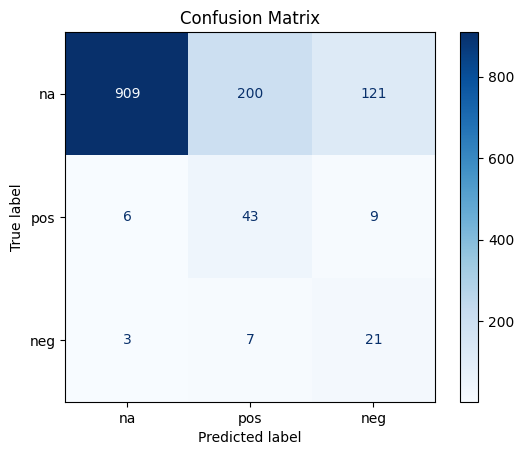

In [27]:
plot_confusion_matrix(y_test, y_pred, labels=y_test.unique())

In [28]:
save_evaluation_report(metrics, "../../../classical_models/uci_results/log_reg_evaluation_report.json")

Evaluation report saved to ../../../classical_models/uci_results/log_reg_evaluation_report.json


In [29]:
joblib.dump(results["model"], "../../../shared/models/log_reg_uci_model.pkl")
joblib.dump(results["vectorizer"], "../../../shared/vectorizers/log_reg_uci_vectorizer.pkl")

['../../../shared/vectorizers/log_reg_uci_vectorizer.pkl']